In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/ZM.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-09-20    280.670013
2021-09-21    278.239990
2021-09-22    277.950012
2021-09-23    276.190002
2021-09-24    272.359985
Name: Close, dtype: float64

STEP 2 : 각종 전처리 수행

In [2]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [3]:
# 로그 변환 시도 
ts_log = np.log(ts)

STEP 3 : 시계열 안정성 분석

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [5]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/ZM.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-20,278.649994,285.000000,276.910004,280.670013,280.670013,3905300
1,2021-09-21,281.027008,281.170013,275.065002,278.239990,278.239990,4168300
2,2021-09-22,276.200012,279.390015,275.250000,277.950012,277.950012,2973700
3,2021-09-23,279.910004,280.359009,275.450012,276.190002,276.190002,2867900
4,2021-09-24,274.640015,275.899994,267.191010,272.359985,272.359985,4051700


In [6]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-20,278.649994,285.000000,276.910004,280.670013,280.670013,3905300
2021-09-21,281.027008,281.170013,275.065002,278.239990,278.239990,4168300
2021-09-22,276.200012,279.390015,275.250000,277.950012,277.950012,2973700
2021-09-23,279.910004,280.359009,275.450012,276.190002,276.190002,2867900
2021-09-24,274.640015,275.899994,267.191010,272.359985,272.359985,4051700


In [7]:
ts1 = df['Close']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2021-09-20    280.670013
2021-09-21    278.239990
2021-09-22    277.950012
2021-09-23    276.190002
2021-09-24    272.359985
Name: Close, dtype: float64

시계열 안정성의 정성적 분석

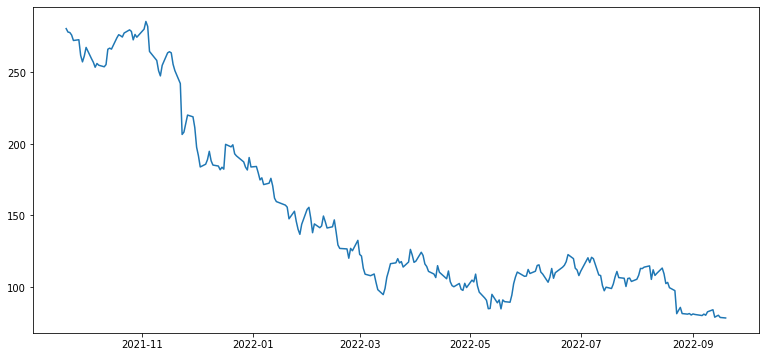

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

결측치 유무 확인

In [9]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

Series([], Name: Close, dtype: float64)


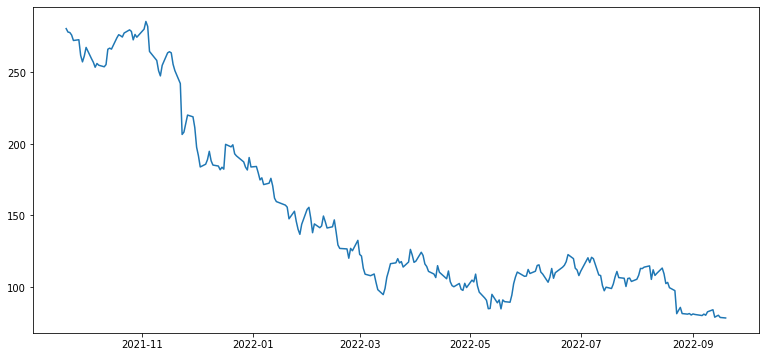

In [10]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

In [11]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


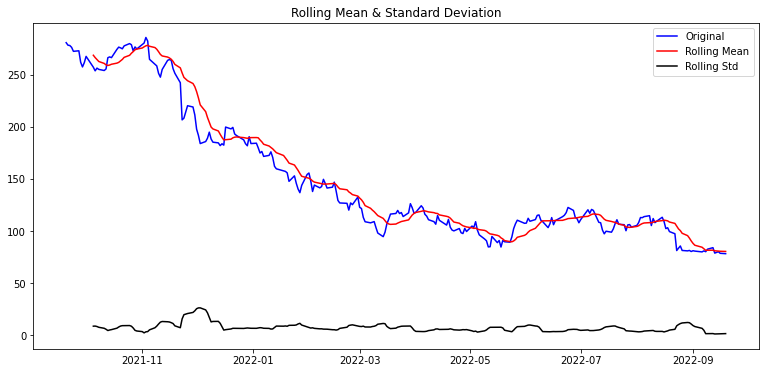

In [12]:
plot_rolling_statistics(ts1, window=12)

다른 데이터에 대해서도 비교해 보기

In [13]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/ZM.csv' 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-20,278.649994,285.000000,276.910004,280.670013,280.670013,3905300
2021-09-21,281.027008,281.170013,275.065002,278.239990,278.239990,4168300
2021-09-22,276.200012,279.390015,275.250000,277.950012,277.950012,2973700
2021-09-23,279.910004,280.359009,275.450012,276.190002,276.190002,2867900
2021-09-24,274.640015,275.899994,267.191010,272.359985,272.359985,4051700


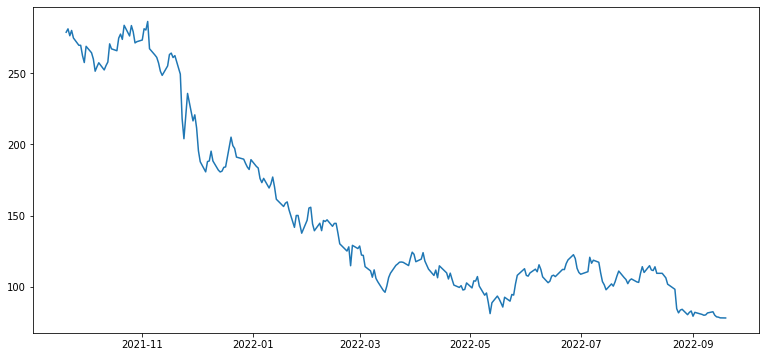

In [14]:
ts2 = df['Open']
plt.plot(ts2)

rolling statistics를 추가해서 시각화해 보겠습니다.

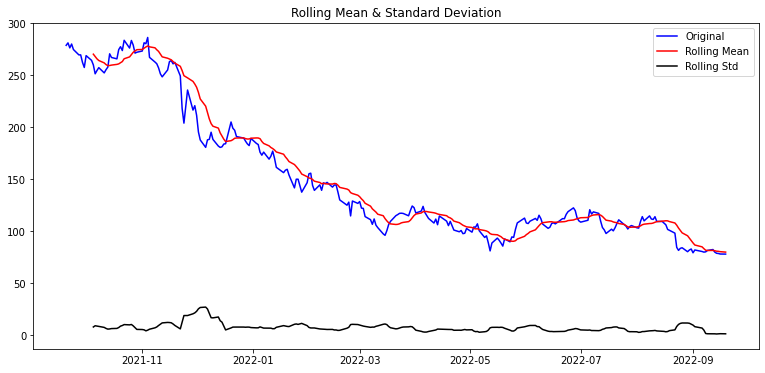

In [15]:
plot_rolling_statistics(ts2, window=12)

In [16]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


정성적으로 분석해 보았던 두 시계열(Time Series)에 대한 Augmented Dickey-Fuller Test를 수행해 보기

In [17]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.764897
p-value                          0.398023
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [18]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                  -1.663270
p-value                          0.450129
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


Stationary한 시계열로 가공해 가기

1-1. 로그함수 변환

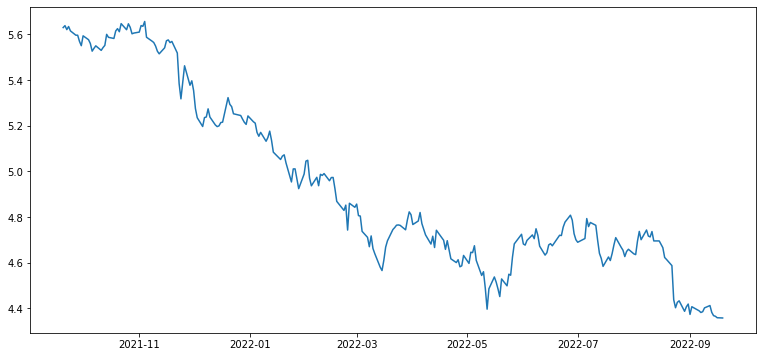

In [19]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [20]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.117026
p-value                          0.708235
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


1-2. Moving average 제거 - 추세(Trend) 상쇄하기

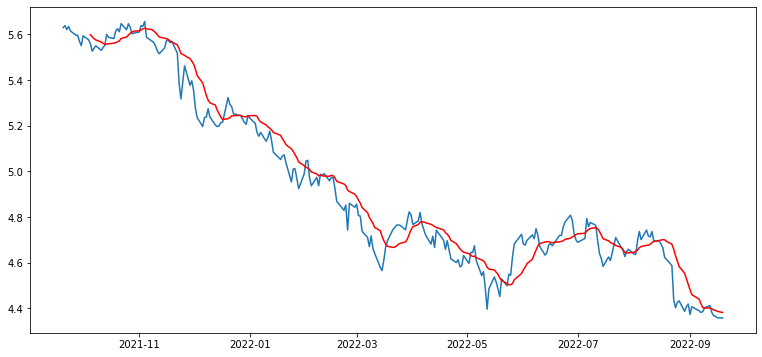

In [21]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(46)

Date
2021-09-20         NaN
2021-09-21         NaN
2021-09-22         NaN
2021-09-23         NaN
2021-09-24         NaN
2021-09-27         NaN
2021-09-28         NaN
2021-09-29         NaN
2021-09-30         NaN
2021-10-01         NaN
2021-10-04         NaN
2021-10-05   -0.038555
2021-10-06   -0.063365
2021-10-07   -0.042701
2021-10-08   -0.025826
2021-10-11   -0.036960
2021-10-12   -0.018687
2021-10-13   -0.005342
2021-10-14    0.042667
2021-10-15    0.028170
2021-10-18    0.020537
2021-10-19    0.051576
2021-10-20    0.057760
2021-10-21    0.039981
2021-10-22    0.065365
2021-10-25    0.031870
2021-10-26    0.049883
2021-10-27    0.025863
2021-10-28   -0.007457
2021-10-29   -0.008784
2021-11-01   -0.005283
2021-11-02    0.018922
2021-11-03    0.011357
2021-11-04    0.029061
2021-11-05   -0.036931
2021-11-08   -0.050316
2021-11-09   -0.049759
2021-11-10   -0.059174
2021-11-11   -0.071754
2021-11-12   -0.073652
2021-11-15   -0.042228
2021-11-16   -0.008527
2021-11-17   -0.001878
2021-1

In [23]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(46)

Date
2021-10-05   -0.038555
2021-10-06   -0.063365
2021-10-07   -0.042701
2021-10-08   -0.025826
2021-10-11   -0.036960
2021-10-12   -0.018687
2021-10-13   -0.005342
2021-10-14    0.042667
2021-10-15    0.028170
2021-10-18    0.020537
2021-10-19    0.051576
2021-10-20    0.057760
2021-10-21    0.039981
2021-10-22    0.065365
2021-10-25    0.031870
2021-10-26    0.049883
2021-10-27    0.025863
2021-10-28   -0.007457
2021-10-29   -0.008784
2021-11-01   -0.005283
2021-11-02    0.018922
2021-11-03    0.011357
2021-11-04    0.029061
2021-11-05   -0.036931
2021-11-08   -0.050316
2021-11-09   -0.049759
2021-11-10   -0.059174
2021-11-11   -0.071754
2021-11-12   -0.073652
2021-11-15   -0.042228
2021-11-16   -0.008527
2021-11-17   -0.001878
2021-11-18   -0.007547
2021-11-19    0.003179
2021-11-22   -0.036063
2021-11-23   -0.152927
2021-11-24   -0.198936
2021-11-26   -0.045497
2021-11-29   -0.116469
2021-11-30   -0.086288
2021-12-01   -0.115638
2021-12-02   -0.172064
2021-12-03   -0.184217
2021-1

메서드들을 활용하여 ts_log_moving_avg를 정성, 정량적으로 분석해보기

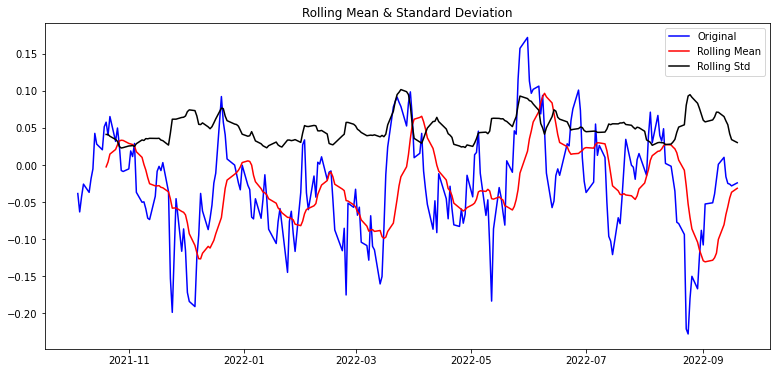

In [24]:
plot_rolling_statistics(ts_log_moving_avg)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.545091
p-value                          0.000163
#Lags Used                       0.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)            -2.573229
dtype: float64


95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있다.

Moving Average를 계산하는 window=12로 정확하게 지정하기. 만약 위 코드에서 window=6을 적용한다면,

In [26]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
print('슝=3')

슝=3


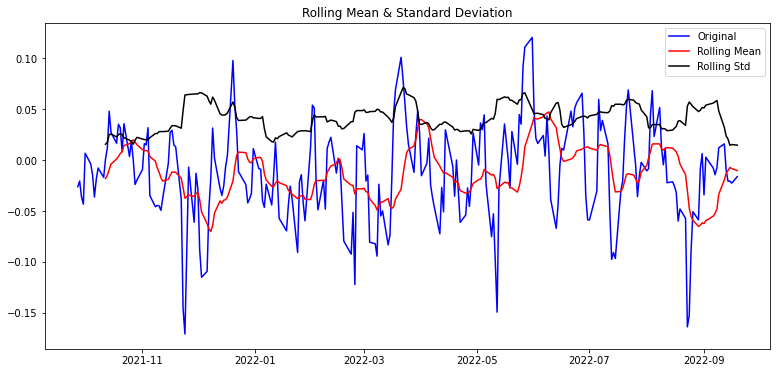

In [27]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [28]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -4.955409
p-value                          0.000027
#Lags Used                       5.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


이 데이터셋은 월 단위로 발생하는 시계열이므로 12개월 단위로 주기성이 있기 때문에 window=12가 적당하다는 것을 추측할 수도 있을 것 같습니다만, moving average를 고려할 때는 rolling mean을 구하기 위한 window 크기를 결정하는 것이 매우 중요하다

1-3. 차분(Differencing) - 계절성(Seasonality) 상쇄하기

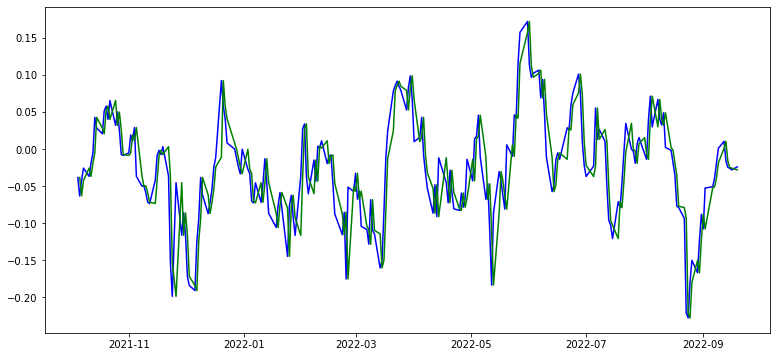

In [29]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

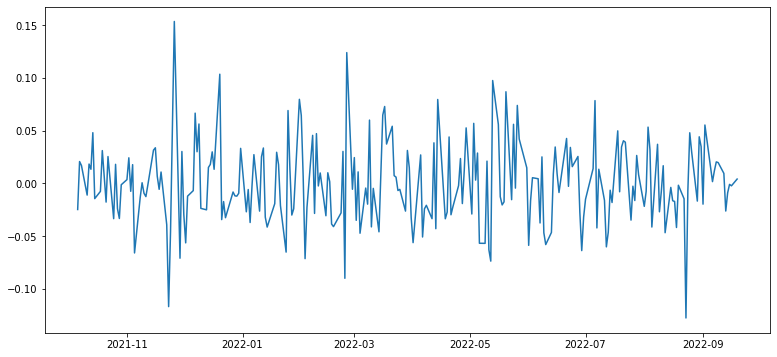

In [30]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

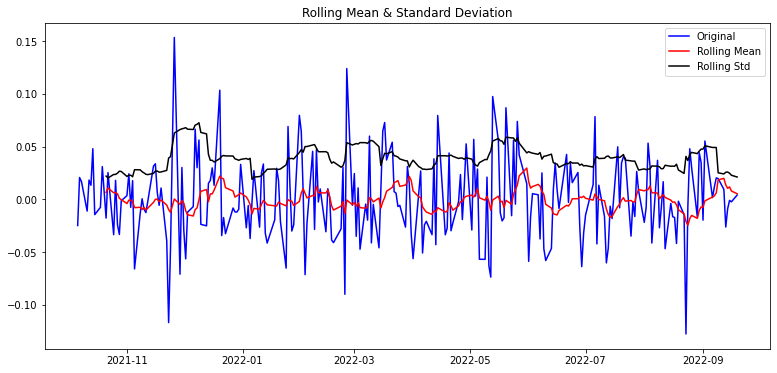

In [31]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [32]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.614493e+01
p-value                        4.633937e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


2.시계열 분해(Time series decomposition)

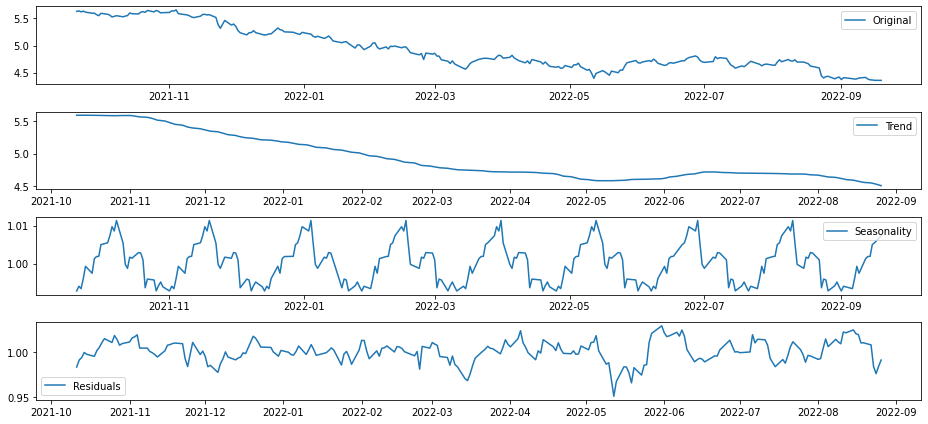

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

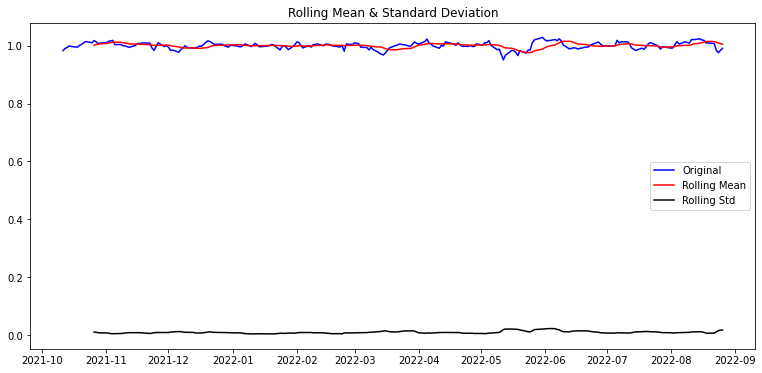

In [34]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [35]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.357822
p-value                          0.000004
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


STEP 4 : 학습, 테스트 데이터셋 생성

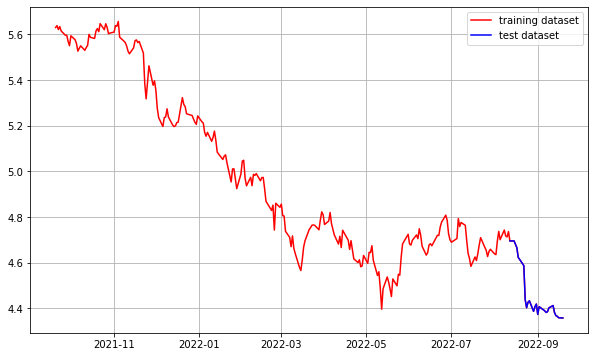

In [36]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

STEP 5 : 적정 ARIMA 모수 찾기

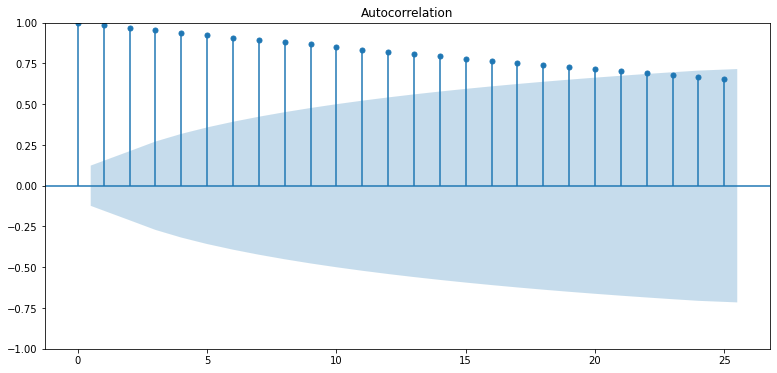

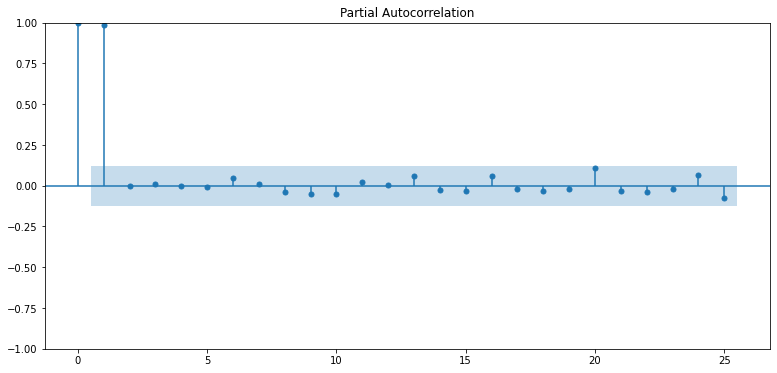

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.649323e+01
p-value                        2.182554e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


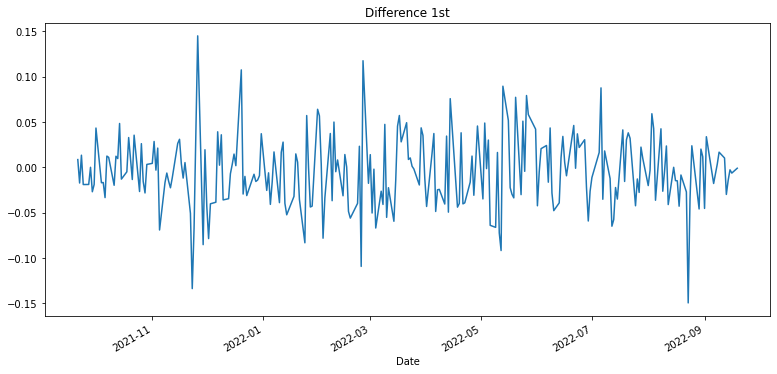

In [38]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.047384e+01
p-value                        1.263928e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


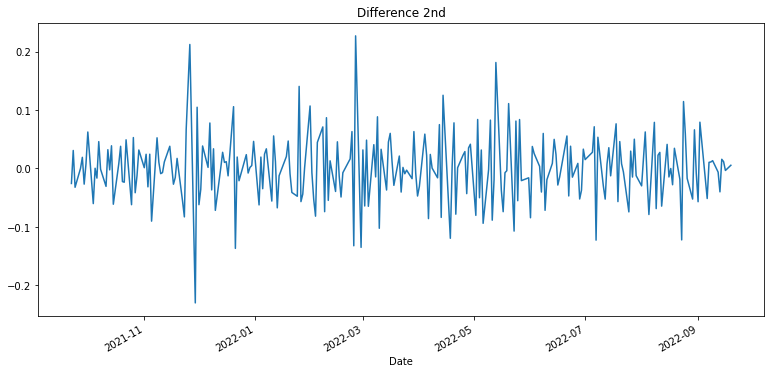

In [39]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

학습 데이터 분리

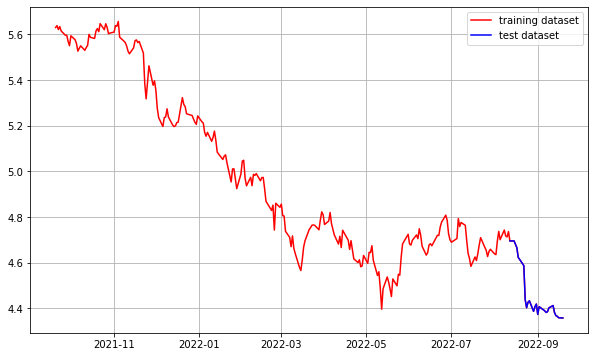

In [40]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [42]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2021-09-20    5.629956
2021-09-21    5.638451
Name: Open, dtype: float64
(226,)
(26,)


ARIMA 모델 훈련과 추론

In [43]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  226
Model:                ARIMA(14, 1, 0)   Log Likelihood                 407.023
Date:                Wed, 21 Sep 2022   AIC                           -784.046
Time:                        03:20:36   BIC                           -732.805
Sample:                             0   HQIC                          -763.365
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0607      0.054     -1.130      0.259      -0.166       0.045
ar.L2          0.0058      0.066      0.088      0.930      -0.124       0.136
ar.L3         -0.0627      0.062     -1.007      0.3

ARIMA 모델이 훈련 결과를 시각적으로 확인해보기

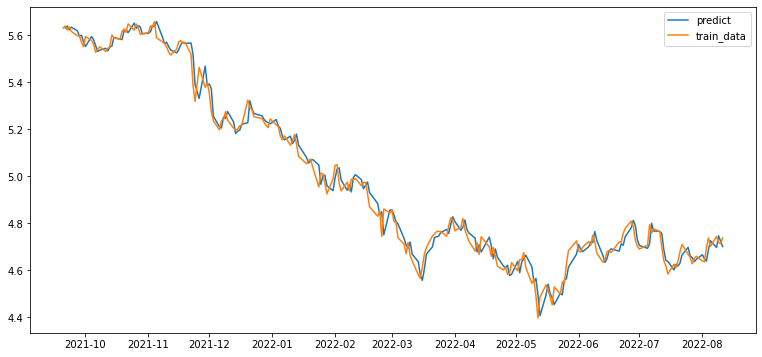

In [44]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측해보기

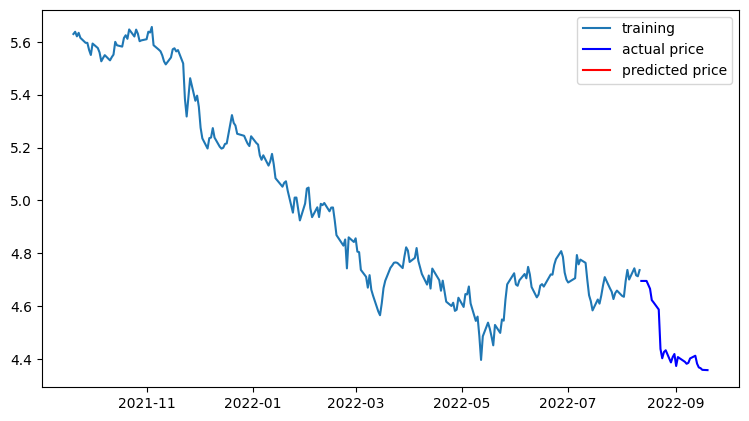

In [45]:
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

np.exp()를 통해 전부 원본 스케일로 돌린 후 MSE, MAE, RMSE, MAPE를 계산

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  934.2287306200262
MAE:  28.444188716493684
RMSE:  30.56515549805082
MAPE: nan%


MAPE 값이 다르게 나와 처음부터 다시 시도해 보았다. 이번에는 arima 값을 다른 값으로 주었다.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

dataset_filepath =  os.getenv('HOME') + '/aiffel/stock_prediction/data/ZM.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2021-09-20    280.670013
2021-09-21    278.239990
2021-09-22    277.950012
2021-09-23    276.190002
2021-09-24    272.359985
Name: Close, dtype: float64

Preprocessing

In [48]:
ts=ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [49]:
ts_log = np.log(ts)

EDA

In [50]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  
    rolstd = timeseries.rolling(window=window).std()

    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [51]:
def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')  
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

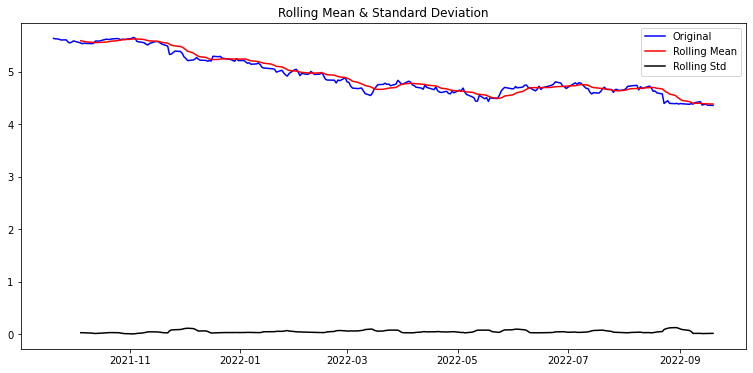

Results of Dickey-Fuller Test:
Test Statistic                  -1.153204
p-value                          0.693395
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


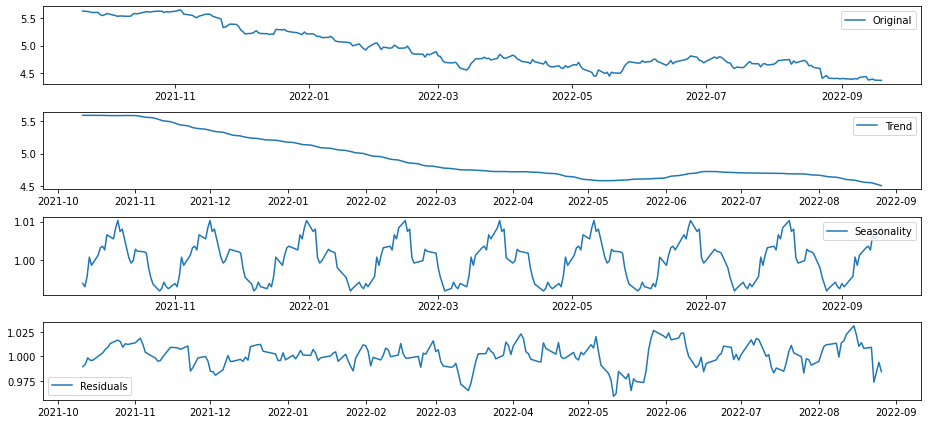

In [52]:
plot_rolling_statistics(ts_log, window=12)

augmented_dickey_fuller_test(ts_log)

decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [53]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.229000
p-value                          0.000008
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


Dataset

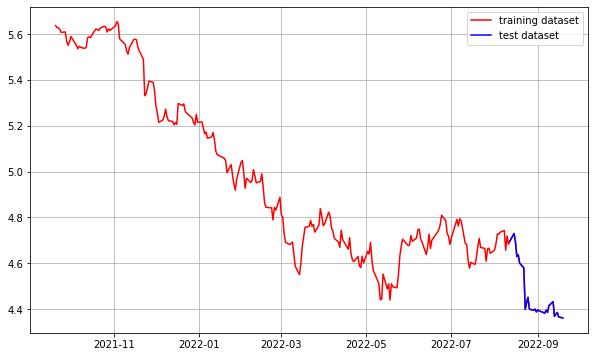

In [54]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

ARIMA

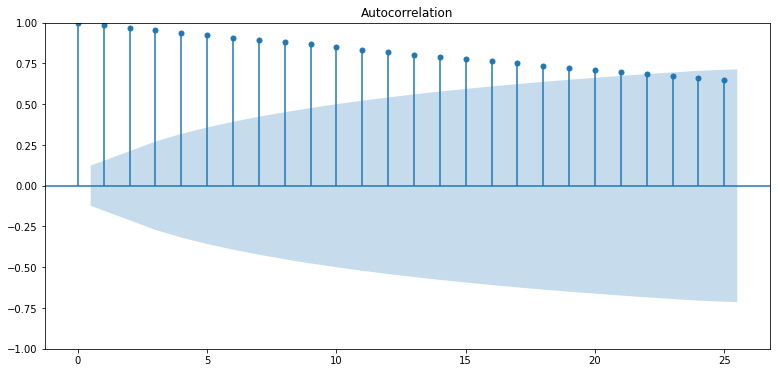

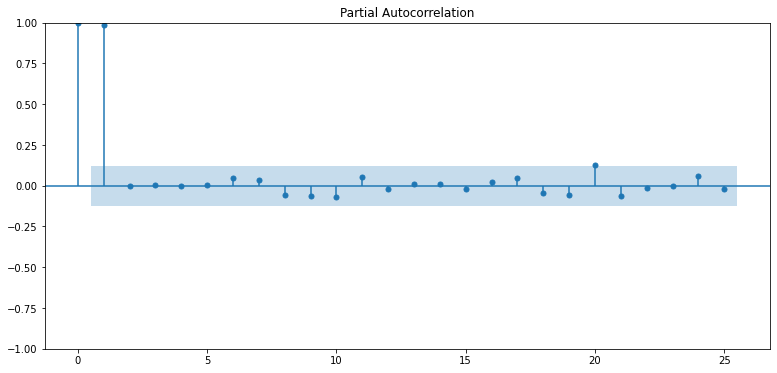

In [55]:
plot_acf(ts_log)   
plot_pacf(ts_log)  
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.597936e+01
p-value                        6.863101e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


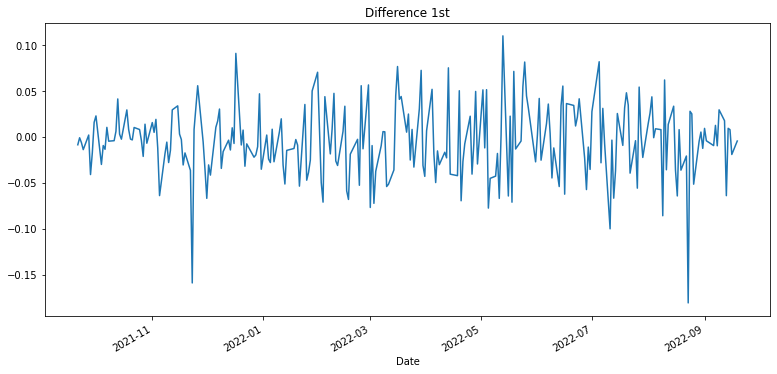

In [56]:
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.077210e+01
p-value                        2.369967e-19
#Lags Used                     7.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


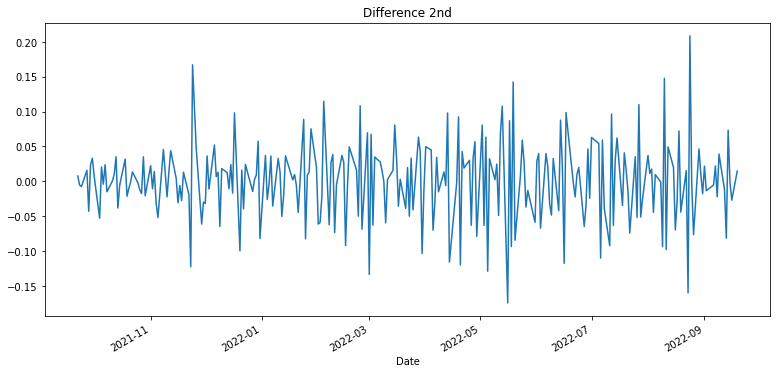

In [57]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

Train & Test

In [58]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 410.211
Date:                Wed, 21 Sep 2022   AIC                           -810.421
Time:                        03:57:49   BIC                           -793.319
Sample:                             0   HQIC                          -803.519
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1067      0.332     15.392      0.000       4.456       5.757
ar.L1          1.2141      6.045      0.201      0.841     -10.634      13.062
ar.L2         -0.2172      6.023     -0.036      0.9

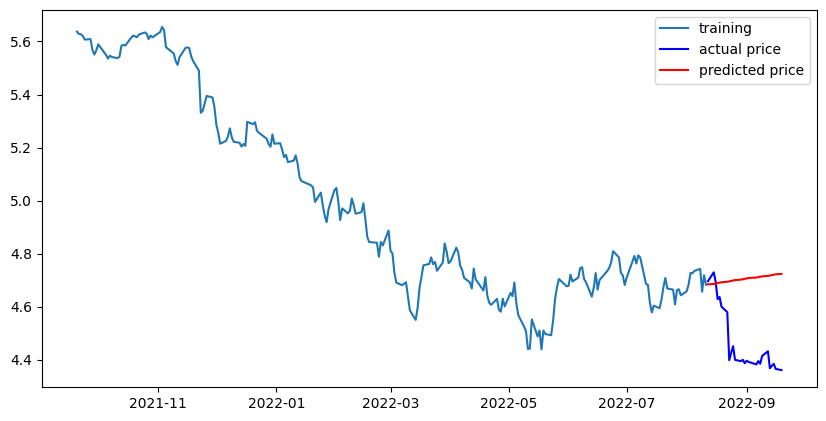

In [59]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  672.3853109449709
MAE:  23.429959542234148
RMSE:  25.93039357481816
MAPE: 28.57%


MAPE의 값이 28.57%로 나왔다. ARIMA에서 order의 값을 다르게 주니 mape의 값이 나왔는데 기존에는 14,1,0으로 주었다면 이번에는 2,0,1으로 넣어보았다. ACF, PACF, 차분 안정성 확인을 위해 적절한 모수를 찾는 것이 중요하다는 사실을 알게 되었다. 예측 모델의 메트릭으로 활용하기에 적당한 MAPE 기준으로 10% 정도의 오차율을 보인다고 하는데, 더 적당한 모수를 찾을 수 있다면 또 다른 값이 나올 것이라는 생각이 든다. 개인적으로 줌 주식은 코로나19가 어느정도 안정이 된 뒤 대면으로 진행하는 일들이 조금 더 늘어나면서 주식이 폭락한 것으로 생각한다. 따라서 28.57%라는 어마무시한 값이 나온 것 것이라 생각하는데, 앞으로 더 큰 전염병이 오거나 줌에서 획기적인 서비스를 기획하지 않는다면 앞으로 줌 주식은 급등하기 힘들 것이라는 생각이다.